## <center> Artificial Intelligence </center>
# <center> LAB PROJECT SUBMISSION </center>
<bold> <center> Submitted to: </bold> Ms Swati Kumari </center>
 <bold> <center> Submitted by: </bold> Aaditya Vardhan(102117021), Shubham Gandhi(102117007), Rahul Divi(102117011), Aryan Raghuwanshi(102117030) </center>

## Problem Statement

Predict the Adani Enterprises Stock Price for the next 30 days.

There are Open, High, Low and Close prices that you need to obtain from the web for each day starting from 2015 to 2022 for adani Industries stock.

- Split the last year into a test set- to build a model to predict stock price.

- Find short term, & long term trends.

- Understand how it is impacted from external factors or any big external events.

- Forecast for next 30 days.

## Description of problem:
- The project finds Open, High, Low and Close prices 
- Understanding of the external and internal factors of the stock
- Forecast for the next 30 days

## Collection of Dataset

- For this project, we will be using the Yfinance library to get the data, which makes it easy to process.

- We collected data from 1-Jan-2015 to 28-Feb-2023.

- But also you can download data from ‘Yahoo! Finance’ website. You can use Below link. 

- https://finance.yahoo.com/quote/adani.NS/history?p=adani.NS

## About the data

- Date: Date of trade

- Open: Opening Price of Stock

- High: Highest price of stock on that day

- Low: Lowest price of stock on that day

- Close: Close price adjusted for splits.

- Adj  Close: Adjusted close price adjusted for splits and dividend and/or capital gain distributions.

- Volume: Volume of stock on that day

### Importing Used Modules
- Brief Description of the imported modules
1. pandas 

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [36]:
# Importing dataset
data=yf.download('adanient.NS', start='2015-1-1', end='2023-2-28').reset_index(drop=False)
adani_0 = pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed


In [37]:
adani_0.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,74.399712,75.495628,73.663994,75.104774,70.727570,3946806
1,2015-01-02,75.304039,76.177704,75.104774,75.472641,71.073990,6565229
2,2015-01-05,75.273384,77.641479,75.212074,76.721832,72.250374,9404837
3,2015-01-06,75.963120,79.381149,74.215782,76.139381,71.701874,18412441
4,2015-01-07,76.637527,77.794754,73.878578,75.464973,71.066780,10863352
5,2015-01-08,76.530235,78.783379,76.453598,78.438515,73.867004,7942903
6,2015-01-09,79.089928,79.817986,76.330978,77.656807,73.130867,12083224
7,2015-01-12,78.269905,80.070892,78.170280,78.867683,74.271156,12302379
8,2015-01-13,79.388817,79.519096,75.863487,76.131721,71.694679,7711411
9,2015-01-14,76.407616,76.438271,74.491676,75.311699,70.922432,6088603


In [38]:
adani_0.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
2006,2023-02-14,1735.0,1889.000000,1611.349976,1749.699951,1749.699951,14579030
2007,2023-02-15,1780.0,1824.400024,1750.000000,1779.099976,1779.099976,7636578
2008,2023-02-16,1820.0,1874.949951,1790.000000,1796.599976,1796.599976,5578515
2009,2023-02-17,1800.0,1815.849976,1703.199951,1722.699951,1722.699951,5392513
2010,2023-02-20,1650.0,1685.000000,1560.500000,1621.449951,1621.449951,6762330
2011,2023-02-21,1626.0,1644.449951,1561.300049,1571.099976,1571.099976,5571915
2012,2023-02-22,1535.0,1560.000000,1381.199951,1404.849976,1404.849976,10606476
2013,2023-02-23,1380.0,1438.000000,1350.000000,1382.650024,1382.650024,8907540
2014,2023-02-24,1410.0,1427.000000,1261.599976,1315.650024,1315.650024,8736727
2015,2023-02-27,1300.0,1313.800049,1131.050049,1193.500000,1193.500000,10271008


# EDA

Analysis is only based on Open, High, Low, close price and volume

There is no need of Adj Close

In [39]:
# Removing "Adj Close" columnfrom dataset
adani_1=adani_0.drop(["Adj Close"],axis=1).reset_index(drop=True)
adani_1

,Date,Open,High,Low,Close,Volume
0,2015-01-01,74.399712,75.495628,73.663994,75.104774,3946806
1,2015-01-02,75.304039,76.177704,75.104774,75.472641,6565229
2,2015-01-05,75.273384,77.641479,75.212074,76.721832,9404837
3,2015-01-06,75.963120,79.381149,74.215782,76.139381,18412441
4,2015-01-07,76.637527,77.794754,73.878578,75.464973,10863352
...,...,...,...,...,...,...
2011,2023-02-21,1626.000000,1644.449951,1561.300049,1571.099976,5571915
2012,2023-02-22,1535.000000,1560.000000,1381.199951,1404.849976,10606476
2013,2023-02-23,1380.000000,1438.000000,1350.000000,1382.650024,8907540
2014,2023-02-24,1410.000000,1427.000000,1261.599976,1315.650024,8736727


In [40]:
# Finding duplicate columns, if any
adani_1[adani_1.duplicated()]

,Date,Open,High,Low,Close,Volume


In [41]:
# Finding null values, if any
adani_1.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [42]:
#To check which rows have any missing value under any column
adani_1[adani_1.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Volume


In [43]:
# Removing the row which have null value
adani_2=adani_1.dropna().reset_index(drop=True)
adani_2

,Date,Open,High,Low,Close,Volume
0,2015-01-01,74.399712,75.495628,73.663994,75.104774,3946806
1,2015-01-02,75.304039,76.177704,75.104774,75.472641,6565229
2,2015-01-05,75.273384,77.641479,75.212074,76.721832,9404837
3,2015-01-06,75.963120,79.381149,74.215782,76.139381,18412441
4,2015-01-07,76.637527,77.794754,73.878578,75.464973,10863352
...,...,...,...,...,...,...
2011,2023-02-21,1626.000000,1644.449951,1561.300049,1571.099976,5571915
2012,2023-02-22,1535.000000,1560.000000,1381.199951,1404.849976,10606476
2013,2023-02-23,1380.000000,1438.000000,1350.000000,1382.650024,8907540
2014,2023-02-24,1410.000000,1427.000000,1261.599976,1315.650024,8736727


In [44]:
# Checking wether if there exist any null values
adani_2[adani_2.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Volume


In [45]:
# Making a copy of dataset as adani
adani=adani_2.copy()
adani

,Date,Open,High,Low,Close,Volume
0,2015-01-01,74.399712,75.495628,73.663994,75.104774,3946806
1,2015-01-02,75.304039,76.177704,75.104774,75.472641,6565229
2,2015-01-05,75.273384,77.641479,75.212074,76.721832,9404837
3,2015-01-06,75.963120,79.381149,74.215782,76.139381,18412441
4,2015-01-07,76.637527,77.794754,73.878578,75.464973,10863352
...,...,...,...,...,...,...
2011,2023-02-21,1626.000000,1644.449951,1561.300049,1571.099976,5571915
2012,2023-02-22,1535.000000,1560.000000,1381.199951,1404.849976,10606476
2013,2023-02-23,1380.000000,1438.000000,1350.000000,1382.650024,8907540
2014,2023-02-24,1410.000000,1427.000000,1261.599976,1315.650024,8736727


#### Discriptive Statistics

In [46]:
adani.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2016 non-null   datetime64[ns]
 1   Open    2016 non-null   float64       
 2   High    2016 non-null   float64       
 3   Low     2016 non-null   float64       
 4   Close   2016 non-null   float64       
 5   Volume  2016 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 94.6 KB


In [47]:
adani.describe()

,Open,High,Low,Close,Volume
count,2016.000000,2016.000000,2016.000000,2016.000000,2.016000e+03
mean,623.985137,635.819773,610.334685,623.187029,8.029662e+06
std,982.032743,997.320182,962.574070,980.014466,1.056264e+07
min,32.149174,33.402447,31.713251,32.012947,2.482490e+05
25%,65.687843,67.302114,63.957783,65.510746,3.094653e+06
50%,137.228462,140.949997,133.375000,137.149994,5.206722e+06
75%,766.500000,802.237503,736.187500,780.625015,8.917879e+06
max,4175.000000,4190.000000,4066.399902,4165.299805,1.701502e+08


In [48]:
adani.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999775,0.999112,0.999145,-0.215898
High,0.999775,1.000000,0.998991,0.999400,-0.212922
Low,0.999112,0.998991,1.000000,0.999698,-0.221773
Close,0.999145,0.999400,0.999698,1.000000,-0.217414
Volume,-0.215898,-0.212922,-0.221773,-0.217414,1.000000


- Every attributes are highly corelated except volume

In [49]:
# converting the date column in to datetime 
adani['Date']=pd.to_datetime(adani['Date'],format='%Y-%m-%d')
adani

,Date,Open,High,Low,Close,Volume
0,2015-01-01,74.399712,75.495628,73.663994,75.104774,3946806
1,2015-01-02,75.304039,76.177704,75.104774,75.472641,6565229
2,2015-01-05,75.273384,77.641479,75.212074,76.721832,9404837
3,2015-01-06,75.963120,79.381149,74.215782,76.139381,18412441
4,2015-01-07,76.637527,77.794754,73.878578,75.464973,10863352
...,...,...,...,...,...,...
2011,2023-02-21,1626.000000,1644.449951,1561.300049,1571.099976,5571915
2012,2023-02-22,1535.000000,1560.000000,1381.199951,1404.849976,10606476
2013,2023-02-23,1380.000000,1438.000000,1350.000000,1382.650024,8907540
2014,2023-02-24,1410.000000,1427.000000,1261.599976,1315.650024,8736727


In [50]:
# Setting the date column as index
adani=adani.set_index('Date')
adani

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-01,74.399712,75.495628,73.663994,75.104774,3946806
2015-01-02,75.304039,76.177704,75.104774,75.472641,6565229
2015-01-05,75.273384,77.641479,75.212074,76.721832,9404837
2015-01-06,75.963120,79.381149,74.215782,76.139381,18412441
2015-01-07,76.637527,77.794754,73.878578,75.464973,10863352
...,...,...,...,...,...
2023-02-21,1626.000000,1644.449951,1561.300049,1571.099976,5571915
2023-02-22,1535.000000,1560.000000,1381.199951,1404.849976,10606476
2023-02-23,1380.000000,1438.000000,1350.000000,1382.650024,8907540


### Visualizations

Text(0.5, 1.0, 'Low')

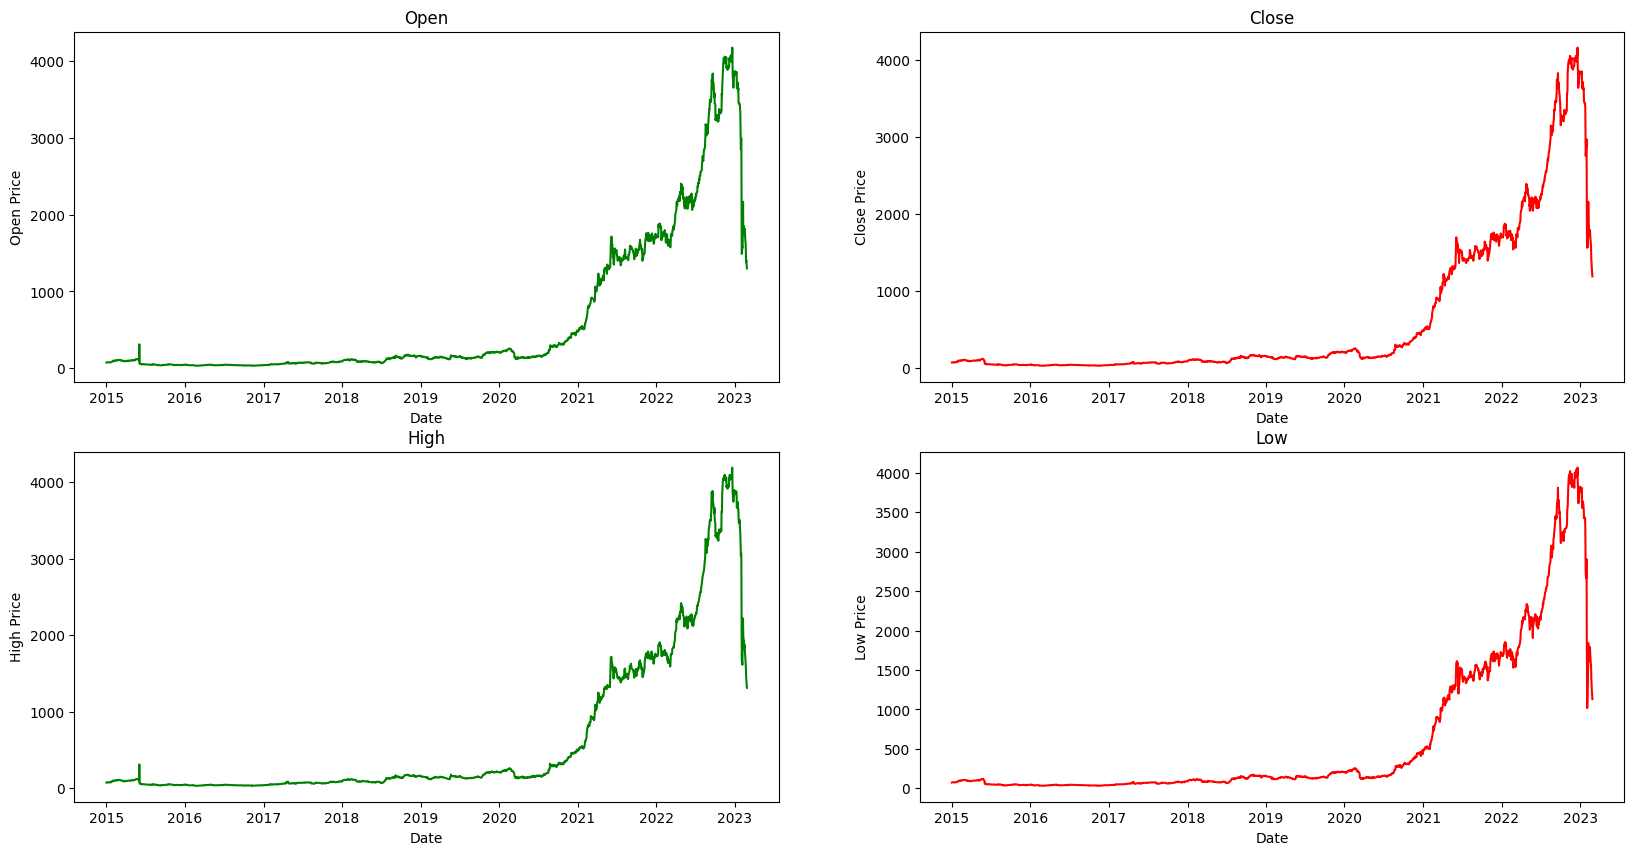

In [51]:
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.plot(adani['Open'],color='green')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.plot(adani['Close'],color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.plot(adani['High'],color='green')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.plot(adani['Low'],color='red')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

Text(0.5, 1.0, 'Low')

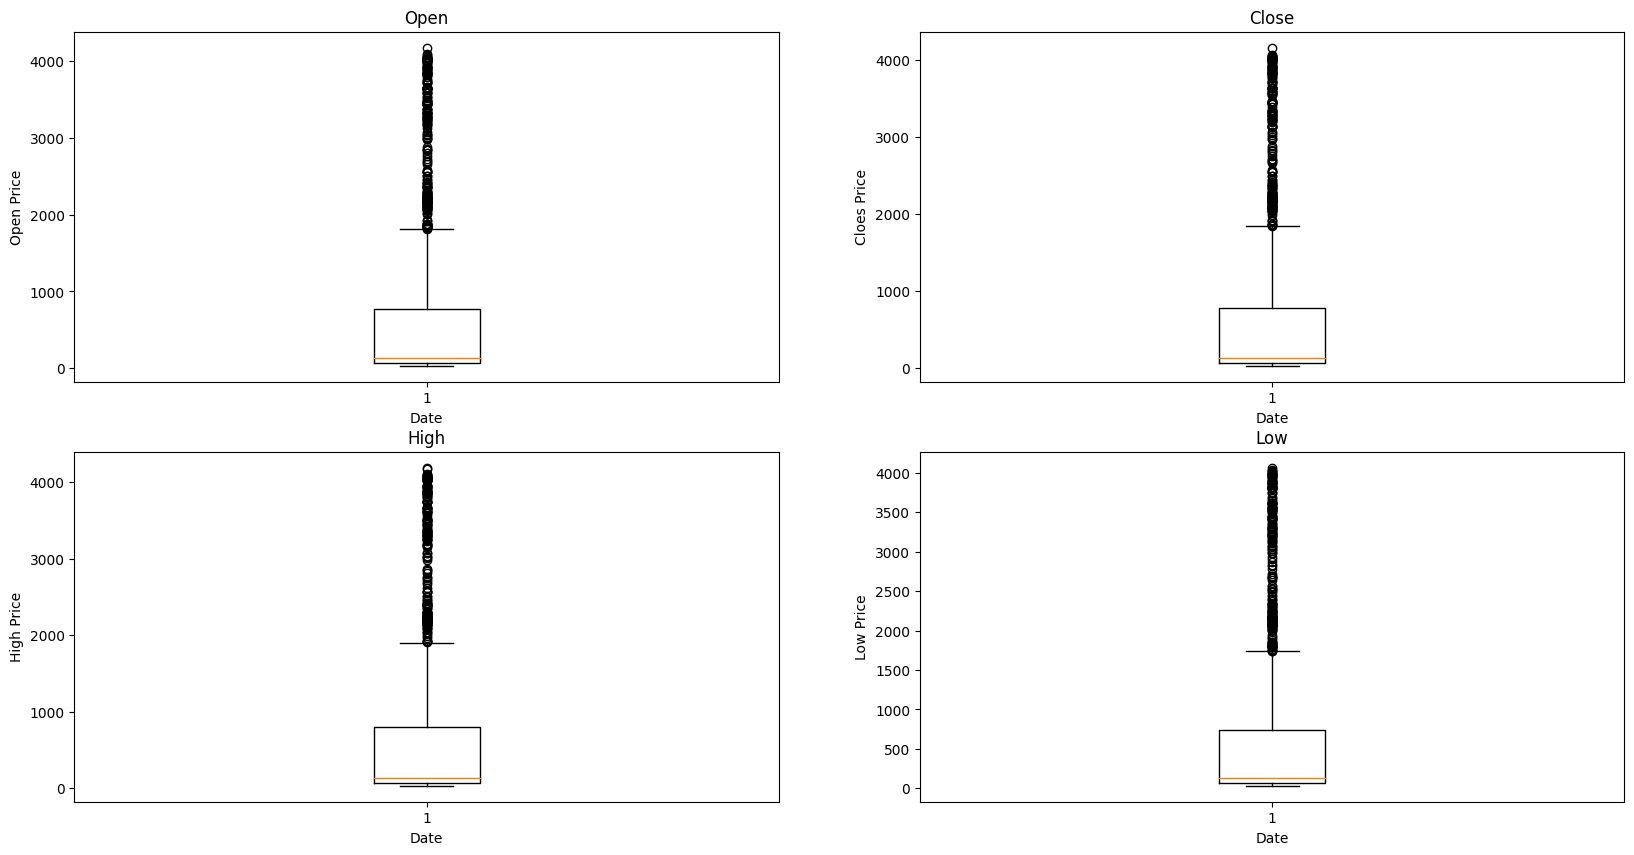

In [52]:
# Creating box-plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.boxplot(adani['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.boxplot(adani['Close'])
plt.xlabel('Date')
plt.ylabel('Cloes Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.boxplot(adani['High'])
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.boxplot(adani['Low'])
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

From the box plot it is clear that there are no outliers inthe dataset

Text(0.5, 1.0, 'Low')

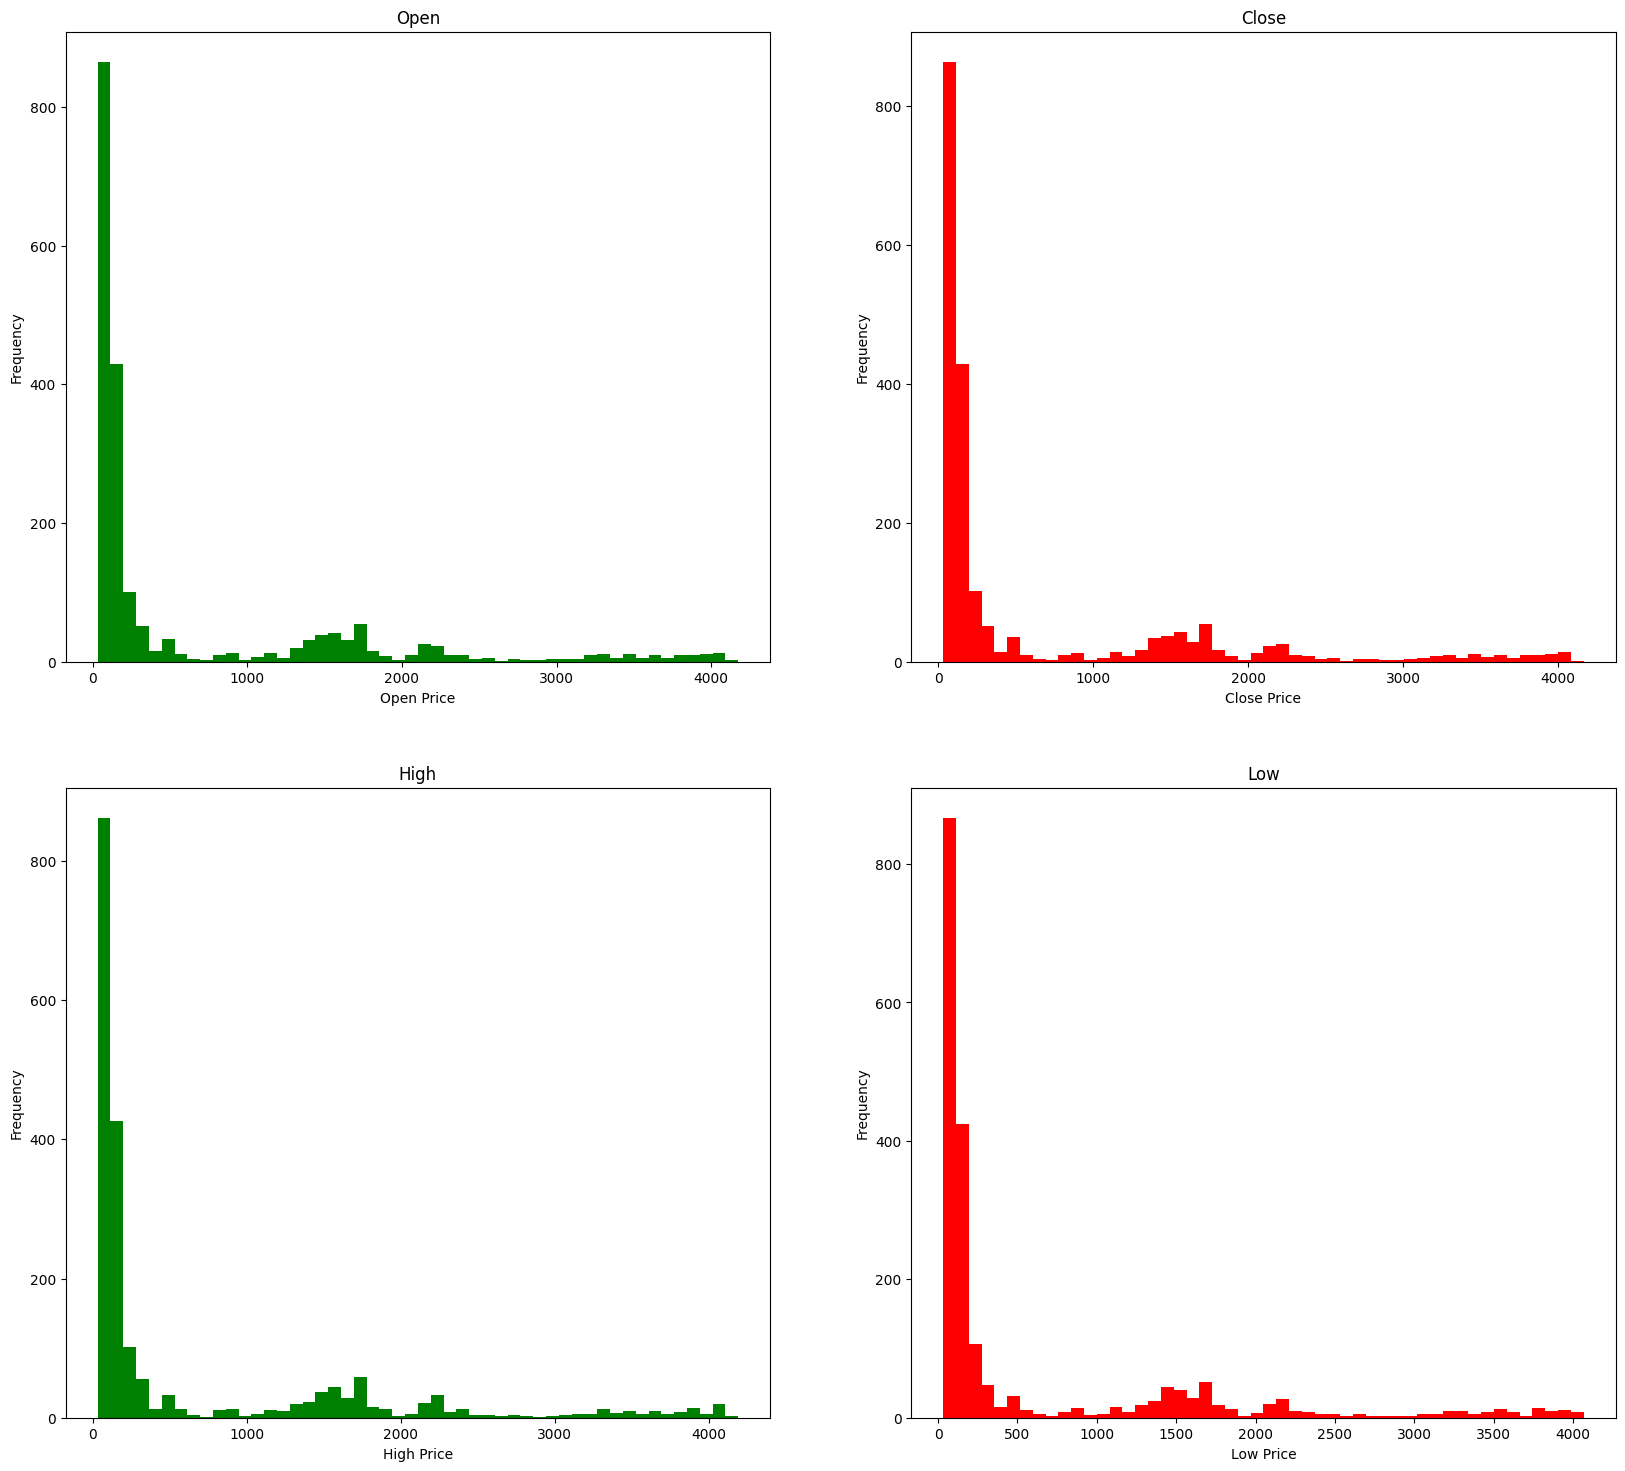

In [53]:
# Ploting Histogram
plt.figure(figsize=(20,18))
#Plot 1
plt.subplot(2,2,1)
plt.hist(adani['Open'],bins=50, color='green')
plt.xlabel("Open Price")
plt.ylabel("Frequency")
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.hist(adani['Close'],bins=50, color='red')
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.hist(adani['High'],bins=50, color='green')
plt.xlabel("High Price")
plt.ylabel("Frequency")
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.hist(adani['Low'],bins=50, color='red')
plt.xlabel("Low Price")
plt.ylabel("Frequency")
plt.title('Low')

Text(0.5, 1.0, 'Low')

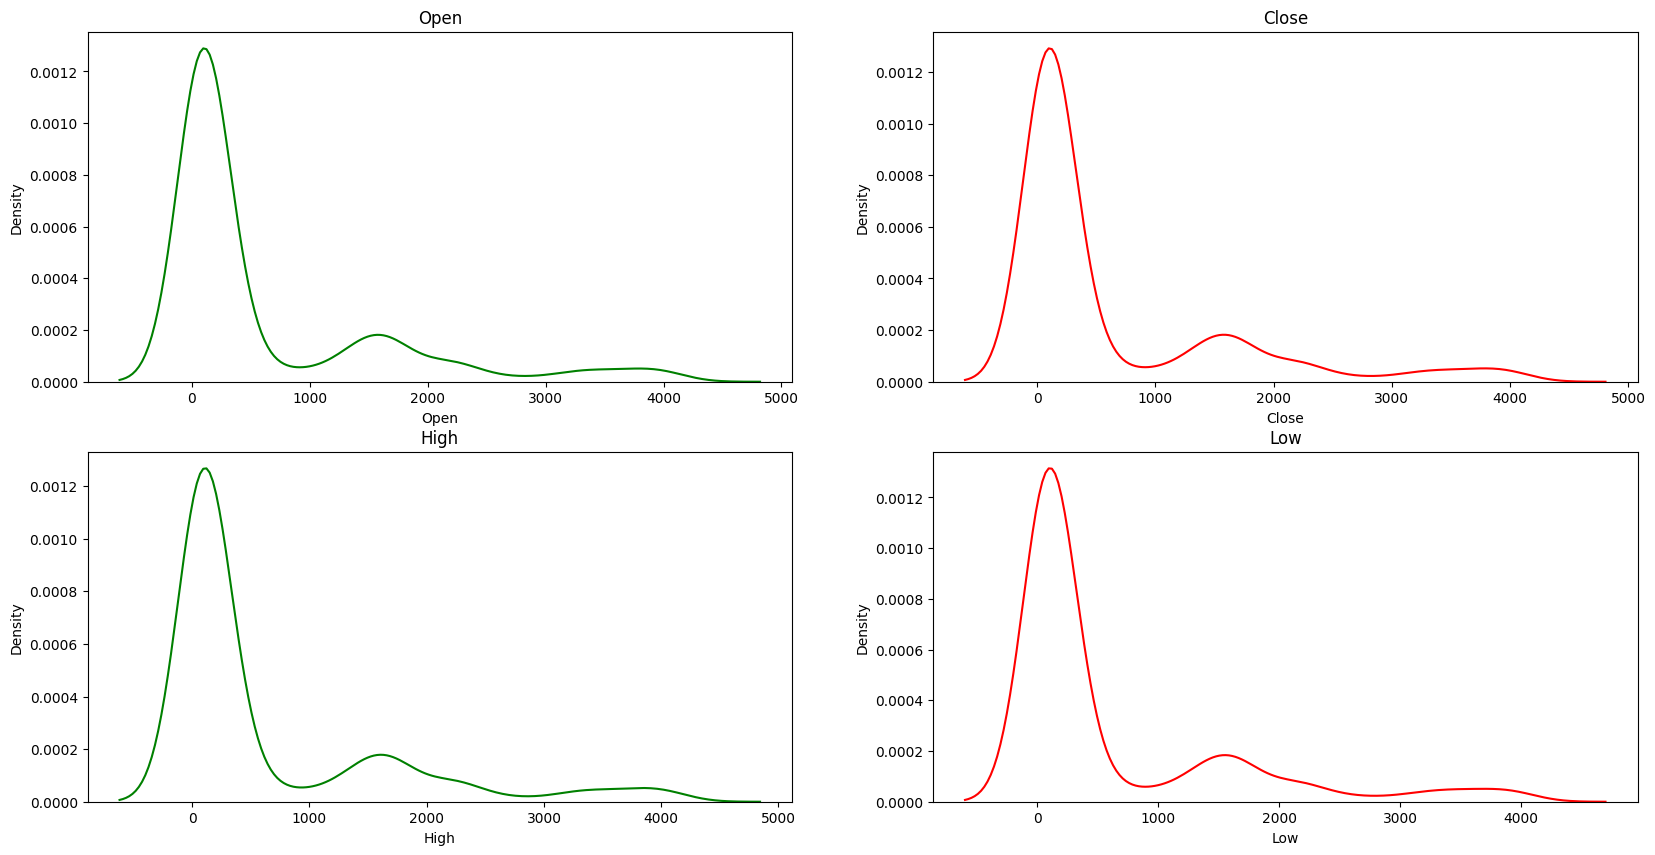

In [54]:
# KDE-Plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
sns.kdeplot(adani['Open'], color='green')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
sns.kdeplot(adani['Close'], color='red')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
sns.kdeplot(adani['High'], color='green')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
sns.kdeplot(adani['Low'], color='red')
plt.title('Low')

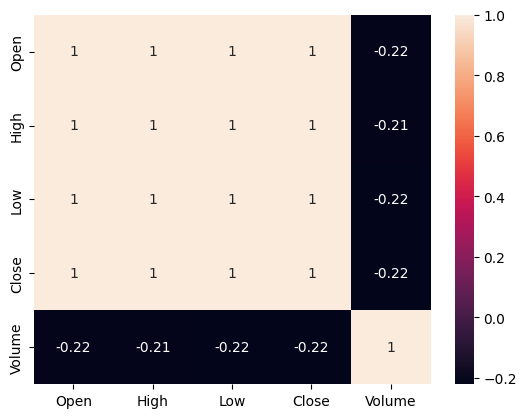

In [55]:
sns.heatmap(adani.corr(),annot=True)
plt.show()

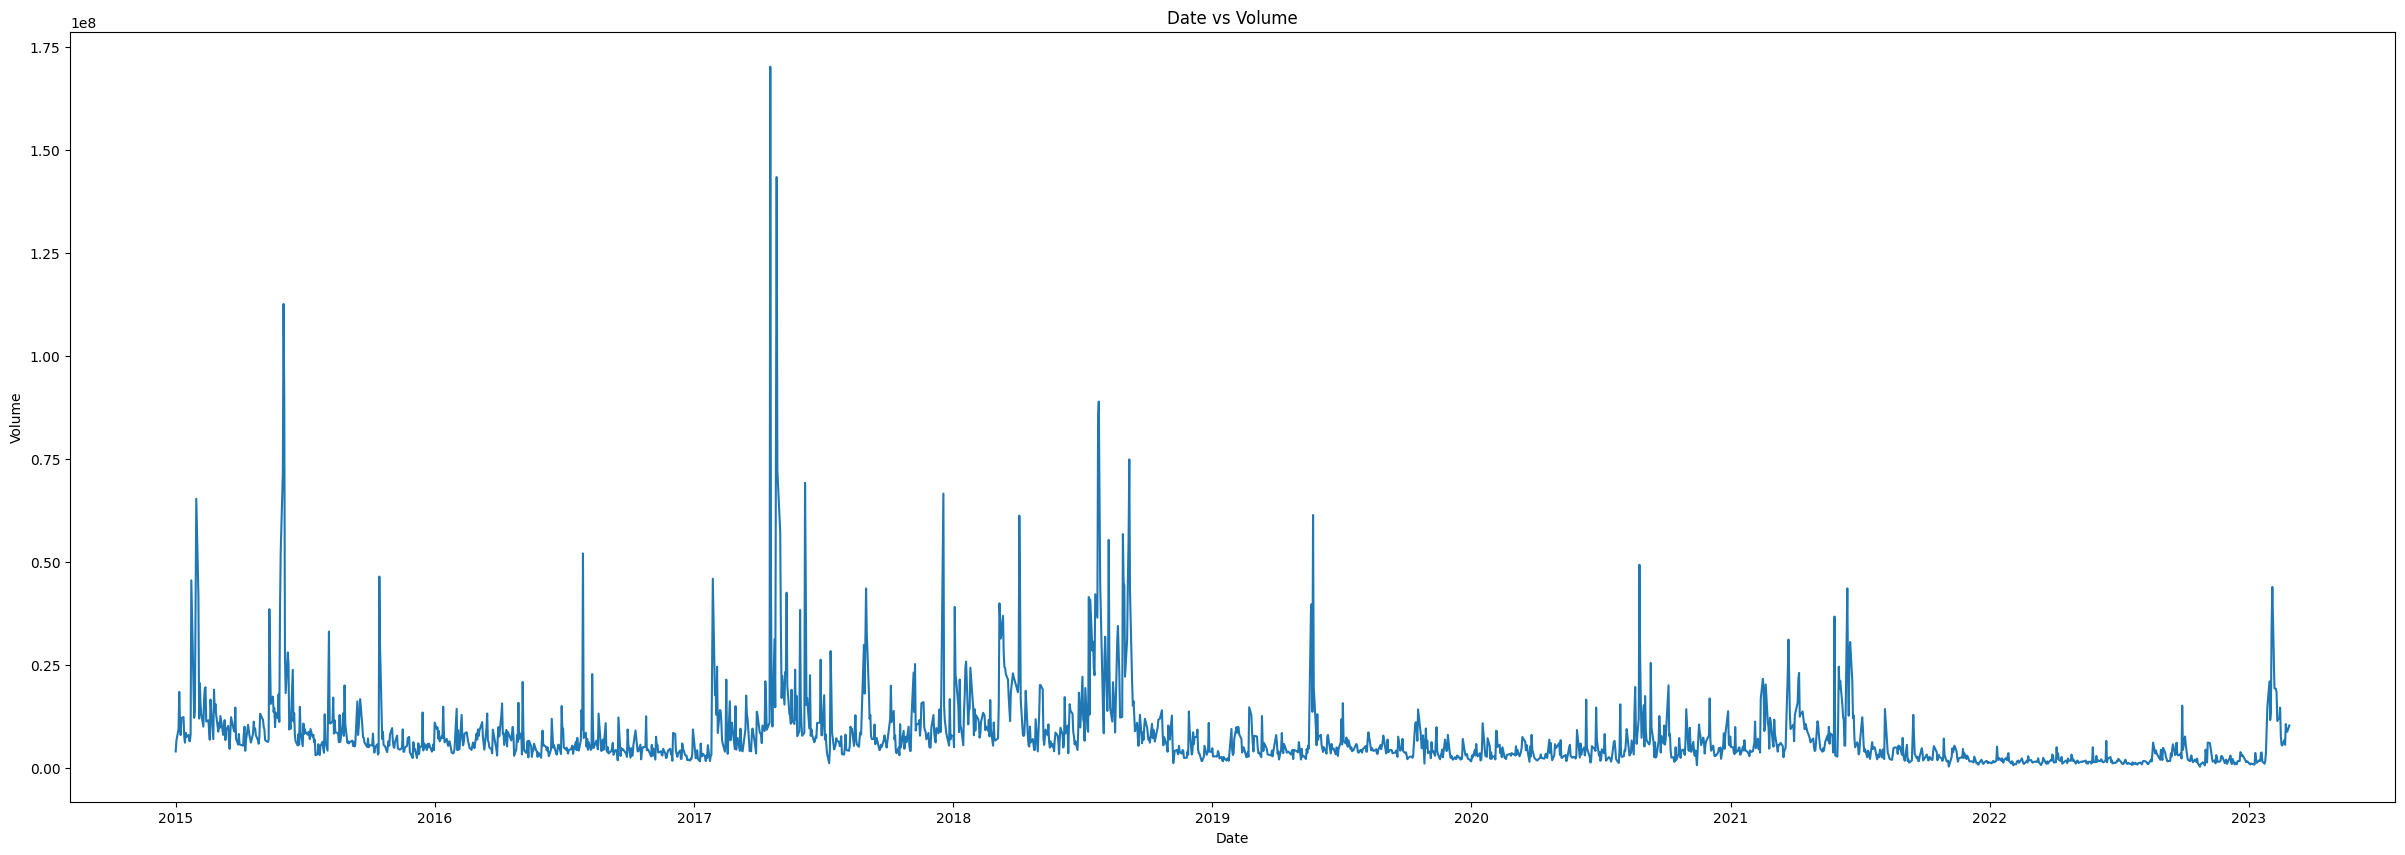

In [56]:
figure=plt.figure(figsize=(30,10))
plt.plot(adani['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Date vs Volume')
plt.show()

## Finding long-term and short-term trends

### Moving Average

In [57]:
adani_ma=adani.copy()
adani_ma['30-day MA']=adani['Close'].rolling(window=30).mean()
adani_ma['200-day MA']=adani['Close'].rolling(window=200).mean()

In [58]:
adani_ma

,Open,High,Low,Close,Volume,30-day MA,200-day MA
Date,,,,,,,
2015-01-01,74.399712,75.495628,73.663994,75.104774,3946806,NaN,NaN
2015-01-02,75.304039,76.177704,75.104774,75.472641,6565229,NaN,NaN
2015-01-05,75.273384,77.641479,75.212074,76.721832,9404837,NaN,NaN
2015-01-06,75.963120,79.381149,74.215782,76.139381,18412441,NaN,NaN
2015-01-07,76.637527,77.794754,73.878578,75.464973,10863352,NaN,NaN
...,...,...,...,...,...,...,...
2023-02-21,1626.000000,1644.449951,1561.300049,1571.099976,5571915,2596.011654,3015.067501
2023-02-22,1535.000000,1560.000000,1381.199951,1404.849976,10606476,2521.276656,3011.103501
2023-02-23,1380.000000,1438.000000,1350.000000,1382.650024,8907540,2446.171655,3007.469251


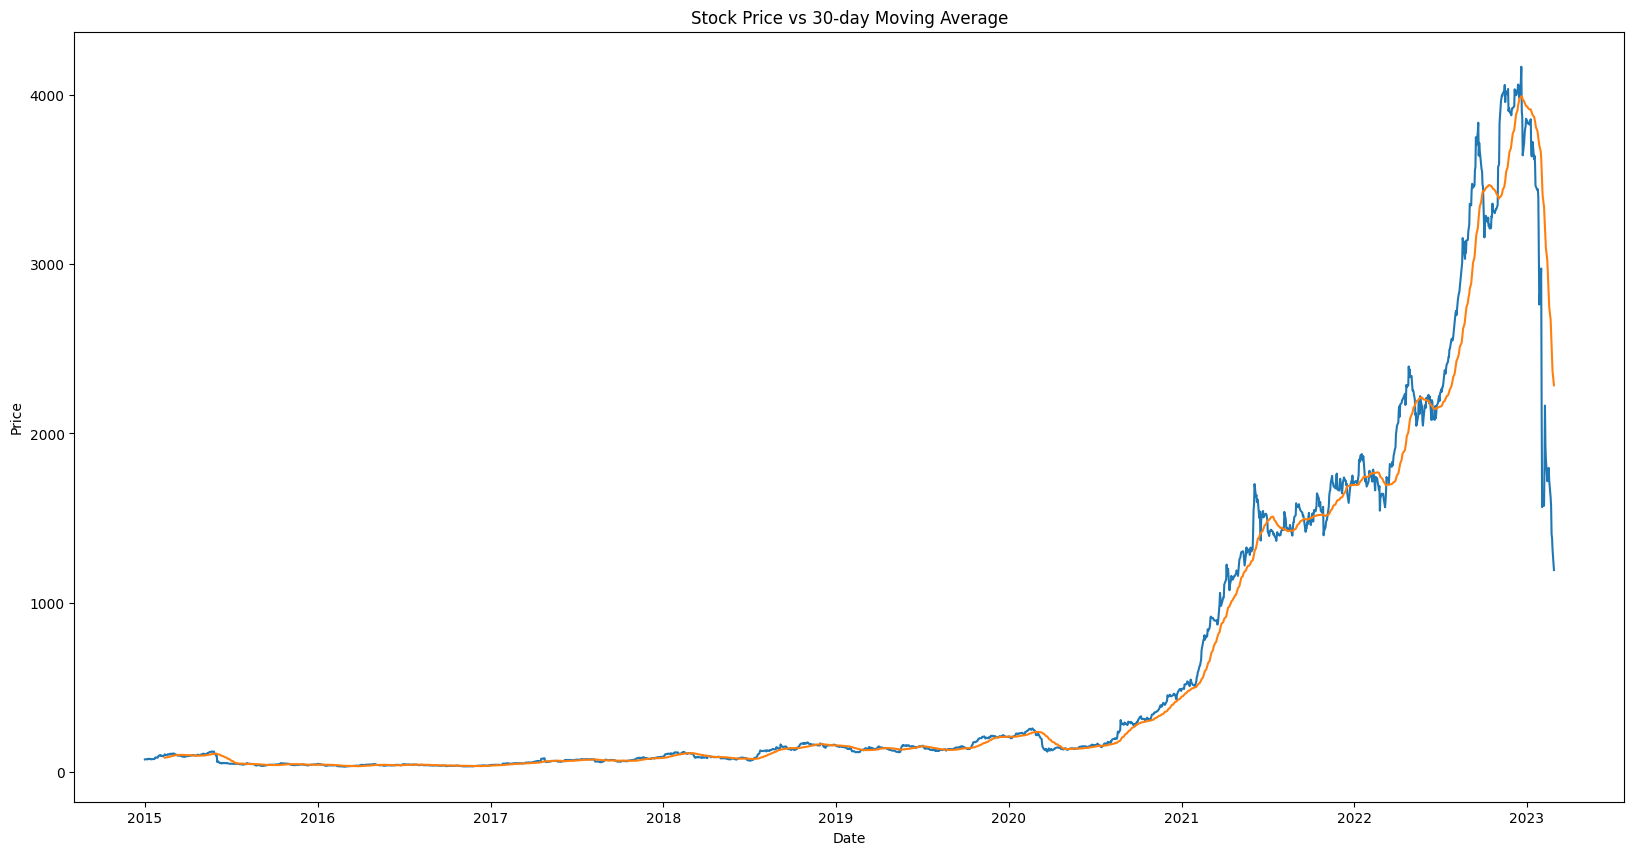

In [59]:
plt.figure(figsize=(20,10))
plt.plot(adani_ma['Close'],label='Original data')
plt.plot(adani_ma['30-day MA'],label='30-MA')
plt.legend
plt.title('Stock Price vs 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

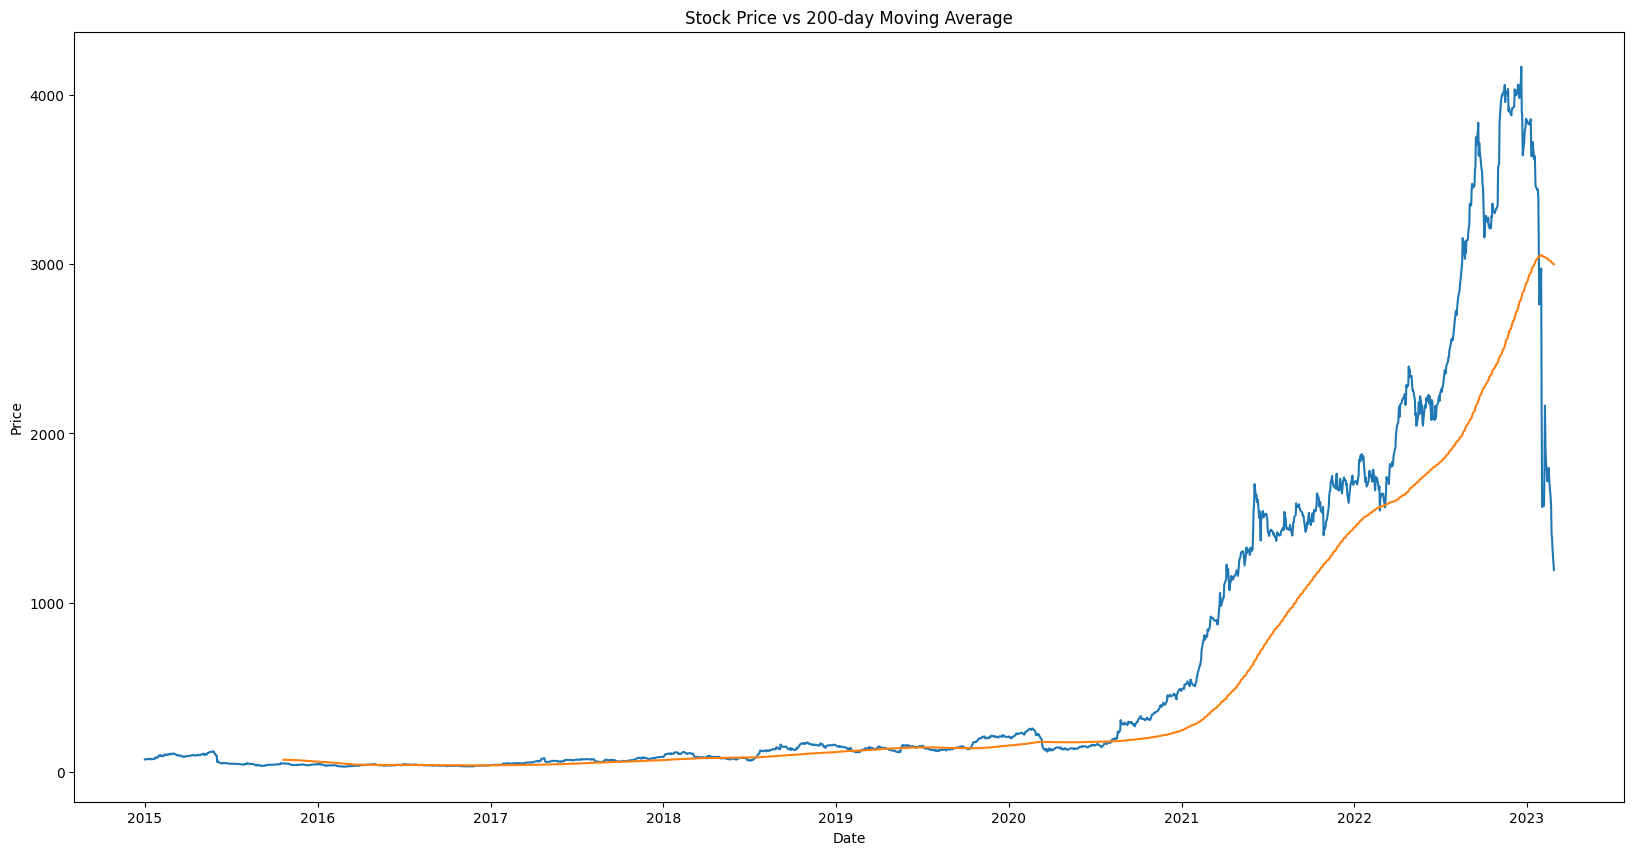

In [60]:
plt.figure(figsize=(20,10))
plt.plot(adani_ma['Close'],label='Original data')
plt.plot(adani_ma['200-day MA'],label='200-MA')
plt.legend
plt.title('Stock Price vs 200-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Long term and short term trends can be identified using the Moving Average graphs
- In long term, Stock price is in upward trend
- Short term trends can be identified from MA-30 chart
- Stock had a major short term downtrend during the year 2020
- It may be due to the bearish market during the Covid-19 outbraek

## Model Building

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import LSTM, GRU

from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [62]:
adani

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-01,74.399712,75.495628,73.663994,75.104774,3946806
2015-01-02,75.304039,76.177704,75.104774,75.472641,6565229
2015-01-05,75.273384,77.641479,75.212074,76.721832,9404837
2015-01-06,75.963120,79.381149,74.215782,76.139381,18412441
2015-01-07,76.637527,77.794754,73.878578,75.464973,10863352
...,...,...,...,...,...
2023-02-21,1626.000000,1644.449951,1561.300049,1571.099976,5571915
2023-02-22,1535.000000,1560.000000,1381.199951,1404.849976,10606476
2023-02-23,1380.000000,1438.000000,1350.000000,1382.650024,8907540


In [63]:
# Creating dataframe which only includes date and close time

close_df=pd.DataFrame(adani['Close'])
close_df

,Close
Date,
2015-01-01,75.104774
2015-01-02,75.472641
2015-01-05,76.721832
2015-01-06,76.139381
2015-01-07,75.464973
...,...
2023-02-21,1571.099976
2023-02-22,1404.849976
2023-02-23,1382.650024


In [64]:
print(close_df.shape)

(2016, 1)


In [65]:
close_df=close_df.reset_index()

In [66]:
close_df['Date']

0      2015-01-01
1      2015-01-02
2      2015-01-05
3      2015-01-06
4      2015-01-07
          ...    
2011   2023-02-21
2012   2023-02-22
2013   2023-02-23
2014   2023-02-24
2015   2023-02-27
Name: Date, Length: 2016, dtype: datetime64[ns]

### Normalizing / scaling close value between 0 to 1

In [67]:
close_stock = close_df.copy()
del close_df['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(close_df).reshape(-1,1))
print(closedf.shape)

(2016, 1)


### Split data for training and testing
- Ratio for training and testing data is 86:14

In [68]:
training_size=int(len(closedf)*0.86)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1733, 1)
test_data:  (283, 1)


### Create new dataset according to requirement of time-series prediction

In [69]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [70]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 13
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1719, 13)
y_train:  (1719,)
X_test:  (269, 13)
y_test (269,)


## Algorithms

## Support vector regression - SVR

In [71]:
import math
from sklearn.svm import SVR

svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.01)
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.01)

In [72]:
# Lets Do the prediction 

train_predict=svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (1719, 1)
Test data prediction: (269, 1)


In [73]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

### Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [74]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))


Train data RMSE:  337.0276204896743
Train data MSE:  113587.61697293191
Test data MAE:  324.5455529672242
-------------------------------------------------------------------------------------
Test data RMSE:  728.6016451526543
Test data MSE:  530860.3573191544
Test data MAE:  630.6355303591197


### Explained variance regression score

The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [75]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.8651833244370482
Test data explained variance regression score: 0.7541072731045266


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best

0 or < 0 = worse

In [76]:
train_r2_svr=r2_score(original_ytrain, train_predict)
test_r2_svr=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_svr)
print("Test data R2 score:", test_r2_svr)

Train data R2 score: 0.43475359395821966
Test data R2 score: 0.22448966783520774


### Comparision between original stock close price vs predicted close price

In [77]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2016, 1)
Test predicted data:  (2016, 1)


### Predicting next 30 days

In [78]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = svr_rbf.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [79]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [80]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [81]:
svrdf=closedf.tolist()
svrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
svrdf=scaler.inverse_transform(svrdf).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(svrdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Random Forest Regressor - RF

In [82]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [83]:
# Lets Do the prediction 

train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (1719, 1)
Test data prediction: (269, 1)


In [84]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

### Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [85]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  6.566053542987049
Train data MSE:  43.113059129372786
Test data MAE:  2.468926710491606
-------------------------------------------------------------------------------------
Test data RMSE:  1321.8514180025982
Test data MSE:  1747291.1712754795
Test data MAE:  1044.6012653745058


### Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [86]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9997854608474905
Test data explained variance regression score: 0.018458236415465845


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best
0 or < 0 = worse

In [87]:
train_r2_rf=r2_score(original_ytrain, train_predict)
test_r2_rf=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_rf)
print("Test data R2 score:", test_r2_rf)

Train data R2 score: 0.9997854563518825
Test data R2 score: -1.5525401133123253


### Comparision between original stock close price vs predicted close price

In [88]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2016, 1)
Test predicted data:  (2016, 1)


### Predicting next 30 days

In [89]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = regressor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = regressor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))


Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [90]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [91]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [92]:
rfdf=closedf.tolist()
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rfdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### K-nearest neighgbour - KNN

In [93]:
from sklearn import neighbors

K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=13)

In [94]:
# Lets Do the prediction 

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (1719, 1)
Test data prediction: (269, 1)


In [95]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

### Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [96]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  19.046264942714977
Train data MSE:  362.7602082680936
Test data MAE:  8.124832189509325
-------------------------------------------------------------------------------------
Test data RMSE:  1328.3165462241775
Test data MSE:  1764424.8469729272
Test data MAE:  1053.7853376624716


### Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [97]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9982047772817602
Test data explained variance regression score: -0.004799251384312031


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best
0 or < 0 = worse

In [98]:
train_r2_knn=r2_score(original_ytrain, train_predict)
test_r2_knn=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_knn)
print("Test data R2 score:", test_r2_knn)

Train data R2 score: 0.998194795265162
Test data R2 score: -1.5775699396087033


### Comparision between original stock close price vs predicted close price

In [99]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2016, 1)
Test predicted data:  (2016, 1)


### Predicting next 30 days

In [100]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = neighbor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = neighbor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [101]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [102]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


### Plotting whole closing stock price with prediction

In [103]:
knndf=closedf.tolist()
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(knndf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


### LSTM

In [104]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1719, 13, 1)
X_test:  (269, 13, 1)


### LSTM model structure

In [105]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [106]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 13, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 13, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [107]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
54/54 [==============================] - 8s 35ms/step - loss: 0.0034 - val_loss: 0.0080
Epoch 2/100
54/54 [==============================] - 1s 9ms/step - loss: 9.5881e-05 - val_loss: 0.0062
Epoch 3/100
54/54 [==============================] - 1s 11ms/step - loss: 8.3283e-05 - val_loss: 0.0086
Epoch 4/100
54/54 [==============================] - 1s 10ms/step - loss: 8.3307e-05 - val_loss: 0.0105
Epoch 5/100
54/54 [==============================] - 1s 10ms/step - loss: 7.5511e-05 - val_loss: 0.0129
Epoch 6/100
54/54 [==============================] - 1s 10ms/step - loss: 7.5379e-05 - val_loss: 0.0106
Epoch 7/100
54/54 [==============================] - 0s 8ms/step - loss: 8.7170e-05 - val_loss: 0.0129
Epoch 8/100
54/54 [==============================] - 0s 8ms/step - loss: 7.3669e-05 - val_loss: 0.0131
Epoch 9/100
54/54 [==============================] - 0s 8ms/step - loss: 7.2705e-05 - val_loss: 0.0144
Epoch 10/100
54/54 [==============================] - 0s 9ms/step - loss

In [108]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

9/9 [==============================] - 0s 3ms/step


((1719, 1), (269, 1))

In [109]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

### Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [110]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  17.99322665801268
Train data MSE:  323.7562055666181
Test data MAE:  9.968865719141137
-------------------------------------------------------------------------------------
Test data RMSE:  278.95409636942804
Test data MSE:  77815.38788128414
Test data MAE:  213.6129232073362


### Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [111]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9985721430645137
Test data explained variance regression score: 0.9344418731330996


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best
0 or < 0 = worse

In [112]:
train_r2_lstm=r2_score(original_ytrain, train_predict)
test_r2_lstm=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_lstm)
print("Test data R2 score:", test_r2_lstm)

Train data R2 score: 0.9983888910031992
Test data R2 score: 0.8863229539156071


### Comparision between original stock close price vs predicted close price

In [113]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2016, 1)
Test predicted data:  (2016, 1)


### Predicting next 30 days

In [114]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [115]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [116]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [117]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### GRU (Gated Recurrent Unit)

In [118]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1719, 13, 1)
X_test:  (269, 13, 1)


In [119]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [120]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 13, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 13, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 13, 32)            6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________


In [121]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
54/54 [==============================] - 10s 39ms/step - loss: 0.0015 - val_loss: 0.0044
Epoch 2/100
54/54 [==============================] - 1s 13ms/step - loss: 6.6743e-05 - val_loss: 0.0038
Epoch 3/100
54/54 [==============================] - 1s 13ms/step - loss: 6.9415e-05 - val_loss: 0.0037
Epoch 4/100
54/54 [==============================] - 1s 12ms/step - loss: 6.0185e-05 - val_loss: 0.0037
Epoch 5/100
54/54 [==============================] - 1s 12ms/step - loss: 6.0108e-05 - val_loss: 0.0042
Epoch 6/100
54/54 [==============================] - 1s 13ms/step - loss: 6.3797e-05 - val_loss: 0.0038
Epoch 7/100
54/54 [==============================] - 1s 12ms/step - loss: 6.0356e-05 - val_loss: 0.0034
Epoch 8/100
54/54 [==============================] - 1s 13ms/step - loss: 5.8653e-05 - val_loss: 0.0033
Epoch 9/100
54/54 [==============================] - 1s 13ms/step - loss: 7.2454e-05 - val_loss: 0.0031
Epoch 10/100
54/54 [==============================] - 1s 14ms/step 

In [122]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

9/9 [==============================] - 0s 4ms/step


((1719, 1), (269, 1))

In [123]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

### Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [124]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  17.610406504119183
Train data MSE:  310.12641724032324
Test data MAE:  12.826373039809267
-------------------------------------------------------------------------------------
Test data RMSE:  220.65068749995655
Test data MSE:  48686.725894203475
Test data MAE:  168.36005795843982


### Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [125]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9988094780671519
Test data explained variance regression score: 0.9595862786344743


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best
0 or < 0 = worse

In [126]:
train_r2_gru=r2_score(original_ytrain, train_predict)
test_r2_gru=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_gru)
print("Test data R2 score:", test_r2_gru)

Train data R2 score: 0.998456716960569
Test data R2 score: 0.9288757232487596


### Comparision between original stock close price vs predicted close price

In [127]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)


names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2016, 1)
Test predicted data:  (2016, 1)


In [128]:
plotdf.head(100)

,Date,original_close,train_predicted_close,test_predicted_close
0,2015-01-01,75.104774,NaN,NaN
1,2015-01-02,75.472641,NaN,NaN
2,2015-01-05,76.721832,NaN,NaN
3,2015-01-06,76.139381,NaN,NaN
4,2015-01-07,75.464973,NaN,NaN
...,...,...,...,...
95,2015-05-25,120.520180,131.584579,NaN
96,2015-05-26,121.623756,131.033707,NaN
97,2015-05-27,121.163933,131.926010,NaN
98,2015-05-28,112.580528,131.757828,NaN


### Predicting next 30 days

In [129]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [130]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [131]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [132]:
grudf=closedf.tolist()
grudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
grudf=scaler.inverse_transform(grudf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])
fig = px.line(grudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [133]:
finaldf = pd.DataFrame({
    'svr':svrdf,
    'rf':rfdf,
    'knn':knndf,
    'lstm':lstmdf,
    'gru':grudf,
})
finaldf

,svr,rf,knn,lstm,gru
0,75.104774,75.104774,75.104774,75.104774,75.104774
1,75.472641,75.472641,75.472641,75.472641,75.472641
2,76.721832,76.721832,76.721832,76.721832,76.721832
3,76.139381,76.139381,76.139381,76.139381,76.139381
4,75.464973,75.464973,75.464973,75.464973,75.464973
...,...,...,...,...,...
2041,1201.867428,1513.258010,1563.788452,1668.410700,1403.692692
2042,1198.824278,1511.278005,1567.046124,1673.701717,1407.252393
2043,1195.459067,1503.810009,1568.049974,1678.045838,1410.709729
2044,1192.325639,1500.590505,1565.123056,1681.795730,1414.067042


### Conclusion Chart

In [134]:
names = cycle(['SVR', 'RF','KNN','LSTM','GRU'])

fig = px.line(finaldf[225:], x=finaldf.index[225:], y=[finaldf['svr'][225:],finaldf['rf'][225:], finaldf['knn'][225:], 
                                          finaldf['lstm'][225:], finaldf['gru'][225:],],
             labels={'x': 'Timestamp','value':'Stock close price'})
fig.update_layout(title_text='Final stock analysis chart', font_size=15, font_color='black',legend_title_text='Algorithms')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [135]:
data={"Model": ["SVR", "Random Forest", "KNN", "LSTM", "GRU"],
    "Train R2 Score": [train_r2_svr, train_r2_rf,train_r2_knn, train_r2_lstm, train_r2_gru],
    "Test R2 Score": [test_r2_svr, test_r2_rf, test_r2_knn, test_r2_lstm, test_r2_gru]}
df=pd.DataFrame(data)
df

,Model,Train R2 Score,Test R2 Score
0,SVR,0.434754,0.224490
1,Random Forest,0.999785,-1.552540
2,KNN,0.998195,-1.577570
3,LSTM,0.998389,0.886323
4,GRU,0.998457,0.928876


## By Looking into this table we can say that our LSTM model have best R2 score.

## so we are going to use LSTM model for our deployment part.